In [27]:
# Imports
import sys
import librosa
import librosa.display as ld
from matplotlib import pyplot as plt
import warnings
import numpy as np
import scipy
import noisereduce

# Check for imports 
libs = ['numpy', 'matplotlib', 'librosa', 'librosa.display', 'warnings', 'scipy', 'np', 'noisereduce']
for lib in libs:
    if lib not in sys.modules and lib not in dir():
        print(f'Error: {lib} is not installed')
        sys.exit(1)
else:
    print('All libraries are installed')        


# Ignore Warnings
warnings.filterwarnings('ignore')


All libraries are installed


Found 15004 audio files
First audio file: c:\Users\awy2k\Desktop\AI-Lab Project\Phase 2\Dataset\cv-valid-train\sample-000000.mp3


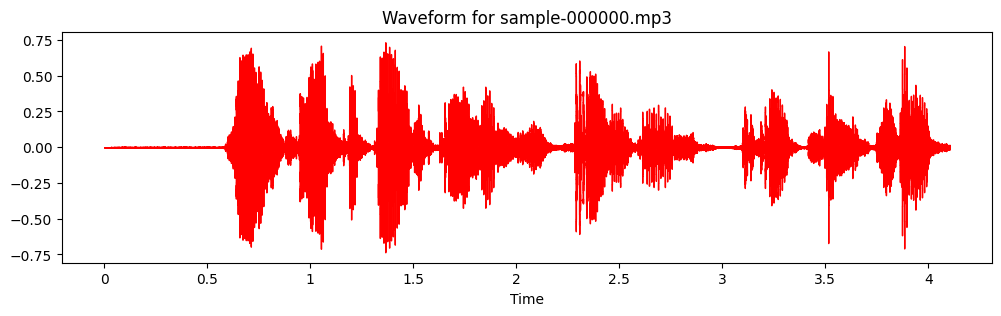

In [28]:
testingDirectory = './Dataset/cv-valid-train'

# Load all the audio files
audioFiles = librosa.util.find_files(testingDirectory, ext=['mp3'], limit=None)
print(f'Found {len(audioFiles)} audio files')

# Load the first audio file and print the name
audioFile = audioFiles[0]
print(f'First audio file: {audioFile}')

# Load the audio file
y, sr = librosa.load(audioFile, sr=16000)

# Display the waveform
plt.figure(figsize=(12, 3))
plt.title(f'Waveform for {audioFile[-17:]}')
ld.waveshow(y, sr=sr, color="red")    # Need to add color param otherwise it cries about an error



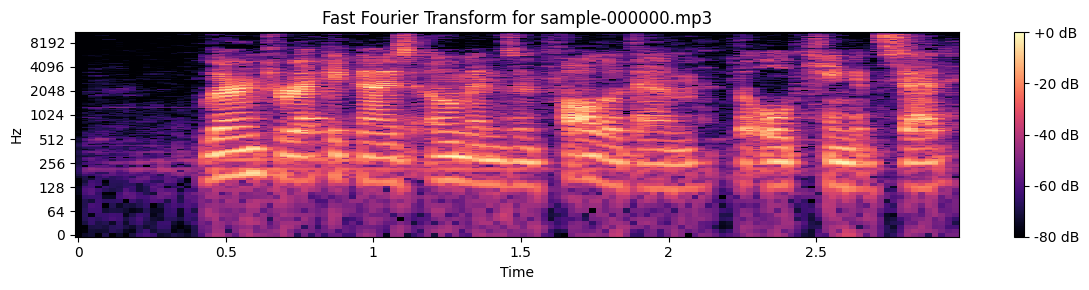

In [29]:
# Apply short-time fast fourier transform to the first file
D = librosa.stft(y)
plt.figure(figsize=(12, 3))
plt.title(f'Fast Fourier Transform for {audioFile[-17:]}')
ld.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()


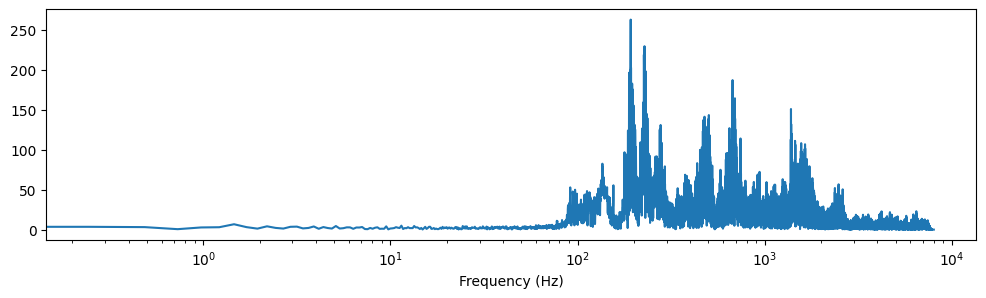

In [32]:
# Plot audio sig as frequency info
# Applies fast fourier transformation to the signal and takes absolute values
y_freq = np.abs(scipy.fftpack.fft(y))

# Establishes all possible frequency (dependent on the sampling rate and the length of the signal)
f = np.linspace(0, sr, len(y_freq))

# Plot audio signal as frequency information.
plt.figure(figsize=(12, 3))
plt.semilogx(f[: len(f) // 2], y_freq[: len(f) // 2])
plt.xlabel("Frequency (Hz)")
plt.show();